In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#loading dataser
df = pd.read_csv('loan_approval_data.csv')

In [3]:
#check for basic info
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [6]:
#checking for duplicate recods
df[df.duplicated()] 
#there are no duplicate records

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status


In [7]:
#checking for missing values
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [11]:
## Encode '?' as "NAN"
df[df == '?'] = np.nan

## Now filling "NAN" with the most frequent value- the mode.
for col in ['gender','dependents','self_employed','loanamount','loan_amount_term','credit_history','married']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,120.0,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [13]:
#checking for missing values again
df.isnull().sum()
# missing values have been imputed

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [14]:
#checking distribution of loan_status wrt categorical columns
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['loan_id', 'gender', 'married', 'education', 'self_employed',
       'property_area', 'loan_status'],
      dtype='object')

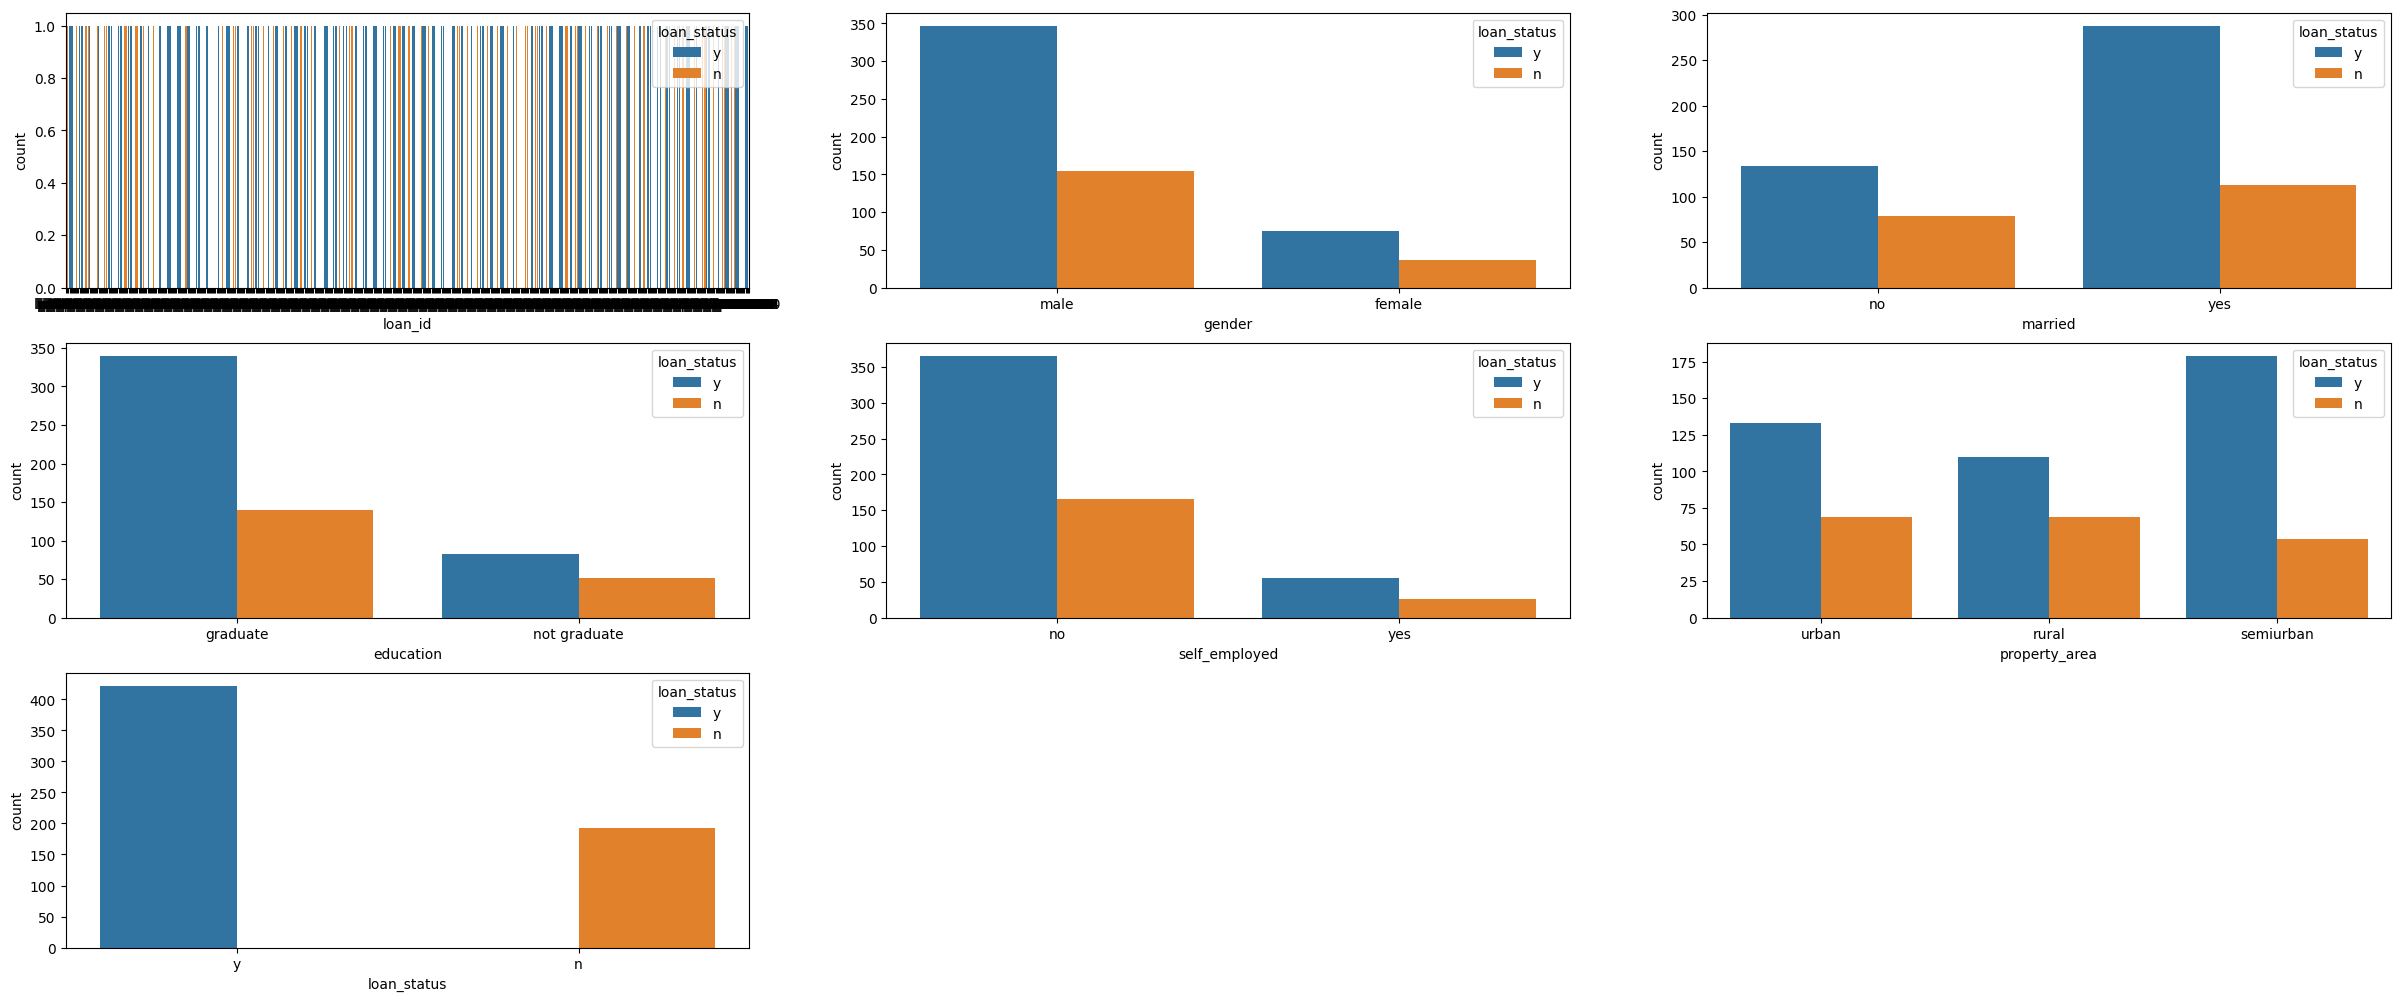

In [22]:
i=1
plt.figure(figsize = (30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'loan_status' , data = df)
    i +=1

**Following are the observations**
* Persons with Male gender, having Married status, having Graduate education, are Self employed and are living in Semiurban area have higher chances of load status being approved

In [25]:
#Encoding categorical data
df_cat = df.select_dtypes(include='object')
le = LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,0.0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [32]:
df=df.drop(['loan_id'],axis=1) #dropping unwanted columns

In [38]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [33]:
#Separating target and independent featues
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [34]:
#Spliting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


In [35]:
# Building Random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
# Checking r2 score
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print('r2-score train:',r2_train)
print('r2-score test',r2_test)

r2-score train: 0.8926084367612294
r2-score test 0.2318601843722563


In [37]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))